In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

In [2]:
data1=sio.loadmat('./Kmeans_1.mat')
data1.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [3]:
X=data1['X']
X.shape

(300, 2)

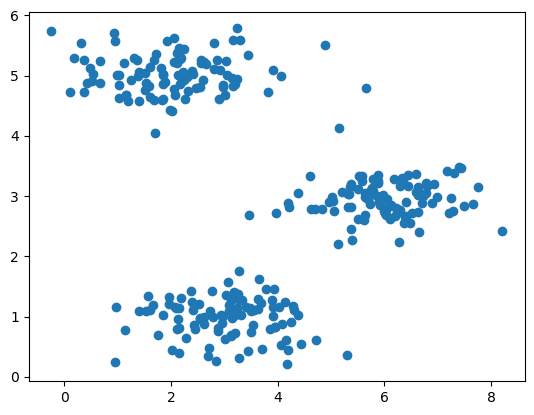

In [4]:
plt.scatter(X[:,0],X[:,1])
plt.show()

In [5]:
def find_centroids(X,centros):
    
    idx=[]
    
    for i in range(len(X)):
        dist = np.linalg.norm((X[i]-centros),axis=1)
        id_i=np.argmin(dist)
        idx.append(id_i)
        
    return np.array(idx)

In [6]:
centros=np.array([[3,3],[6,2],[8,5]])
idx=find_centroids(X,centros)
idx[:3]

array([0, 2, 1], dtype=int64)

In [7]:
def compute_centros(X,idx,k):
    
    centros=[]
    
    for i in range(k):
        centros_i=np.mean(X[idx==i],axis=0)
        centros.append(centros_i)
        
    return np.array(centros)

In [9]:
compute_centros(X,idx,k=3)

array([[2.42830111, 3.15792418],
       [5.81350331, 2.63365645],
       [7.11938687, 3.6166844 ]])

In [14]:
def run_kmeans(X,centros,iters):
    
    k=len(centros)
    centros_all=[]
    centros_all.append(centros)
    centros_i=centros
    for i in range(iters):
        idx=find_centroids(X,centros_i)
        centros_i=compute_centros(X,idx,k)
        centros_all.append(centros_i)
        
    return idx,np.array(centros_all)

In [15]:
def plot_data(X,centros_all,idx):
    plt.figure()
    plt.scatter(X[:,0],X[:,1],c=idx,cmap='rainbow')
    plt.plot(centros_all[:,:,0],centros_all[:,:,1],'kx--')

In [16]:
idx,centros_all=run_kmeans(X,centros,iters=10)

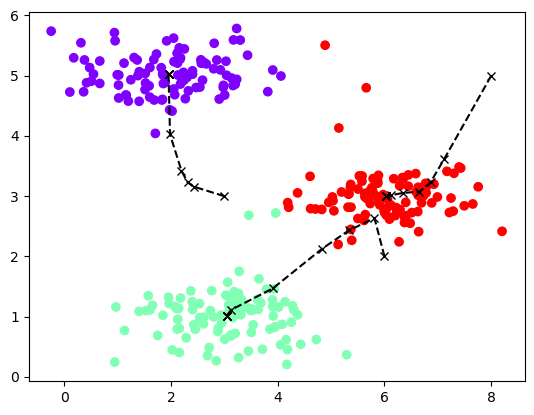

In [17]:
plot_data(X,centros_all,idx)

In [18]:
def init_centros(X,k):
    index=np.random.choice(len(X),k)
    return X[index]

In [19]:
init_centros(X,k=3)

array([[3.91596068, 1.01225774],
       [1.97619886, 4.43489674],
       [5.72395697, 3.04454219]])

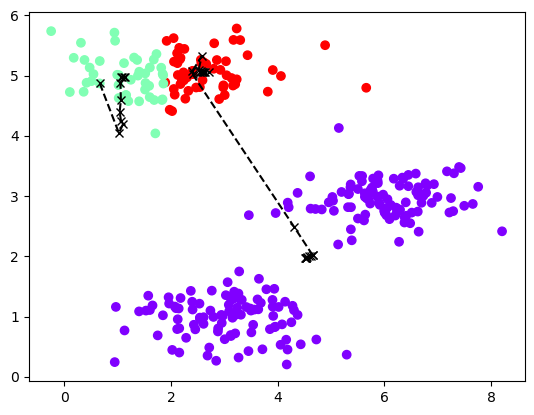

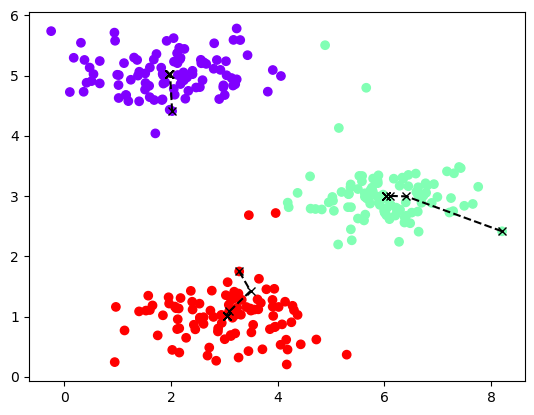

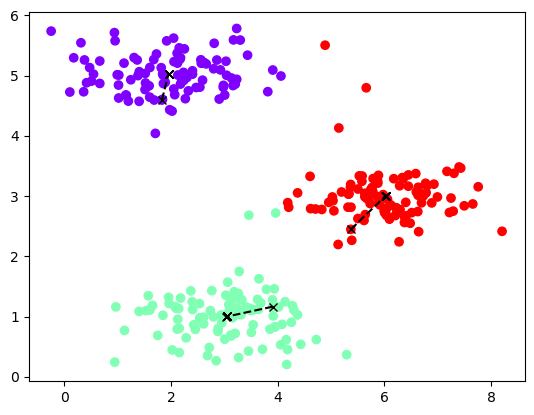

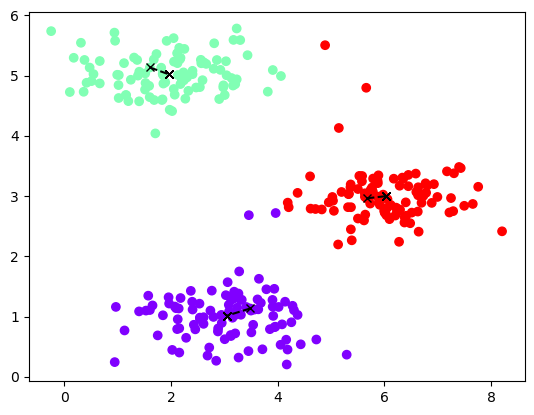

In [24]:
for i in range(4):
    idx,centros_all=run_kmeans(X,init_centros(X,k=3),iters=10)
    plot_data(X,centros_all,idx)